# Circles Quadratic

In [4]:
# 导入
import sys

sys.path.append("E:/dataFiles/github/MFlow")

(200, 2) (200,)
[ 0.11248108 -0.22410019] 1


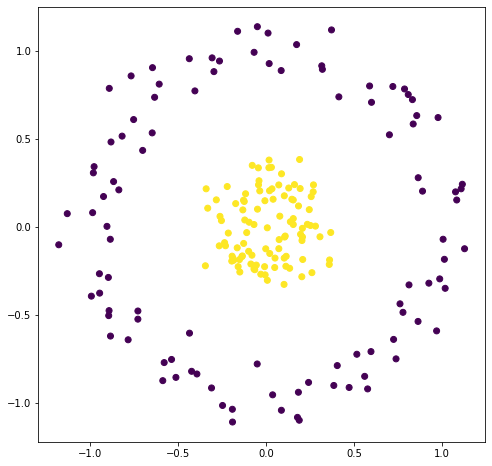

In [5]:
# 数据生成
from sklearn.datasets import make_circles
from mflow import utils

# 加载同心圆数据
xs, ys = make_circles(200, noise=0.1, factor=0.2)
ys = ys * 2 - 1  # 0/1转换为-1/1

print(xs.shape, ys.shape)
print(xs[0], ys[0])
utils.drawXYDatas(xs, ys)

In [6]:
# 训练
import numpy as np
from mflow import core, ops, opts
# from mflow import utils

# 超参数
lr = 0.001
epoch = 200
batch_size = 8

with core.NameScope("Quadratic"):
    # 初始化变量
    x = core.Variable(size=(2, 1), trainable=False)
    y = core.Variable(size=(1, 1), trainable=False)
    w2 = core.Variable(size=(2, 2), trainable=True)
    w1 = core.Variable(size=(1, 2), trainable=True)
    b = core.Variable(size=(1, 1), trainable=True)
    # 模型定义
    pred = ops.Add(
        ops.MatMal(ops.Reshape(x, shape=(1, 2)), ops.MatMal(w2, x)),  # 二次项
        ops.MatMal(w1, x),  # 一次项
        b  # 偏置项
    )
    predicter = ops.Logistic(pred)
    loss = ops.loss.LogLoss(ops.Multiply(y, pred))
    adam = opts.Adam(core.DefaultGraph, loss, lr)
    # utils.drawGraph(core.DefaultGraph)
    # 开始训练
    for ep in range(1, epoch + 1):
        bs_idx = 0  # 批次计数
        # 这是一个epoch的过程
        for i, (feat, lab) in enumerate(zip(xs, ys)):
            x.setValue(np.mat(feat).T)
            y.setValue(np.mat(lab))
            adam.step()
            bs_idx += 1
            if bs_idx == batch_size:
                adam.update()
                bs_idx = 0
        # 一个epoch完成后进行评估
        preds = []
        for feat in xs:
            x.setValue(np.mat(feat).T)
            predicter.forward()
            preds.append(predicter.value[0, 0])  # 结果
        preds = (np.array(preds) > 0.5).astype("int") * 2 - 1
        acc = (ys == preds).astype("uint8").sum() / len(xs)
        print("Epoch: {:d}, acc: {:.3f}.".format(ep, acc))
    # 查看权重
    print("w2:\n", w2.value)
    print("w1:\n", w1.value)
    print("b:\n", b.value)

Epoch: 1, acc: 0.990.
Epoch: 2, acc: 0.950.
Epoch: 3, acc: 0.910.
Epoch: 4, acc: 0.880.
Epoch: 5, acc: 0.870.
Epoch: 6, acc: 0.865.
Epoch: 7, acc: 0.865.
Epoch: 8, acc: 0.870.
Epoch: 9, acc: 0.885.
Epoch: 10, acc: 0.900.
Epoch: 11, acc: 0.900.
Epoch: 12, acc: 0.905.
Epoch: 13, acc: 0.910.
Epoch: 14, acc: 0.920.
Epoch: 15, acc: 0.935.
Epoch: 16, acc: 0.960.
Epoch: 17, acc: 0.960.
Epoch: 18, acc: 0.960.
Epoch: 19, acc: 0.970.
Epoch: 20, acc: 0.980.
Epoch: 21, acc: 0.985.
Epoch: 22, acc: 0.985.
Epoch: 23, acc: 0.985.
Epoch: 24, acc: 0.990.
Epoch: 25, acc: 0.995.
Epoch: 26, acc: 1.000.
Epoch: 27, acc: 1.000.
Epoch: 28, acc: 1.000.
Epoch: 29, acc: 1.000.
Epoch: 30, acc: 1.000.
Epoch: 31, acc: 1.000.
Epoch: 32, acc: 1.000.
Epoch: 33, acc: 1.000.
Epoch: 34, acc: 1.000.
Epoch: 35, acc: 1.000.
Epoch: 36, acc: 1.000.
Epoch: 37, acc: 1.000.
Epoch: 38, acc: 1.000.
Epoch: 39, acc: 1.000.
Epoch: 40, acc: 1.000.
Epoch: 41, acc: 1.000.
Epoch: 42, acc: 1.000.
Epoch: 43, acc: 1.000.
Epoch: 44, acc: 1.00